## This is a script for the exploration of the data for it suitability to ML and modify as required

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# read the data from the csv file
raw_data = pd.read_csv('E-MTAB-2770-query-results.tpms.tsv', skiprows=4, sep='\t')

In [3]:
# head of the data
raw_data.head()

,Gene ID,Gene Name,"22Rv1, prostate carcinoma","23132/87, gastric adenocarcinoma","253J, bladder carcinoma","253J-BV, bladder carcinoma","42-MG-BA, glioblastoma","5637, bladder carcinoma","59M, high grade ovarian serous adenocarcinoma","639-V, ureter urothelial carcinoma",...,"WSU-DLCL2, diffuse large B-cell lymphoma","YAPC, pancreatic carcinoma","YD-10B, tongue squamous cell carcinoma","YD-15, tongue squamous cell carcinoma","YD-38, head and neck squamous cell carcinoma","YD-8, tongue squamous cell carcinoma","YH-13, glioblastoma","YKG1, glioblastoma","ZR-75-1, invasive ductal carcinoma","ZR-75-30, invasive ductal carcinoma"
0,ENSG00000000003,TSPAN6,7.0,10.0,29.0,33.0,33.0,86.0,23.0,45.0,...,0.7,71.0,15.0,31.0,30.0,60.0,39.0,84.0,14.0,23.0
1,ENSG00000000005,TNMD,NaN,NaN,0.1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ENSG00000000419,DPM1,151.0,238.0,94.0,132.0,223.0,222.0,182.0,286.0,...,113.0,239.0,171.0,206.0,208.0,252.0,136.0,235.0,374.0,120.0
3,ENSG00000000457,SCYL3,17.0,27.0,5.0,5.0,5.0,6.0,4.0,5.0,...,11.0,11.0,5.0,5.0,6.0,8.0,10.0,11.0,32.0,21.0
4,ENSG00000000460,C1orf112,24.0,12.0,4.0,9.0,9.0,27.0,9.0,11.0,...,19.0,11.0,7.0,13.0,23.0,8.0,12.0,15.0,20.0,11.0


In [4]:
column_names = list(raw_data.columns)

In [5]:
# itterate over the columns and remove the extra part
new_col_names = []
for i in range(len(column_names)):
    if i > 1:
        n = column_names[i].split(',')[1]
        new_col_names.append(n)
    else:
        new_col_names.append(column_names[i])
        

# trim spaces from the start and end of the column names
new_col_names = [x.strip() for x in new_col_names]
# replace spaces with underscores
new_col_names = [i.replace(' ', '_') for i in new_col_names]

In [6]:
# assign the new column names to the data
raw_data.columns = new_col_names

#### Cancer type distribution in the data
From the data it can be seen that the different cancer type are equally distributed and skewed in certain way. some cancer are represented as low as 1 sample and some are present in more the 60 samples. This will create a biased in modelling so it will be addressed later on in the script using different approach

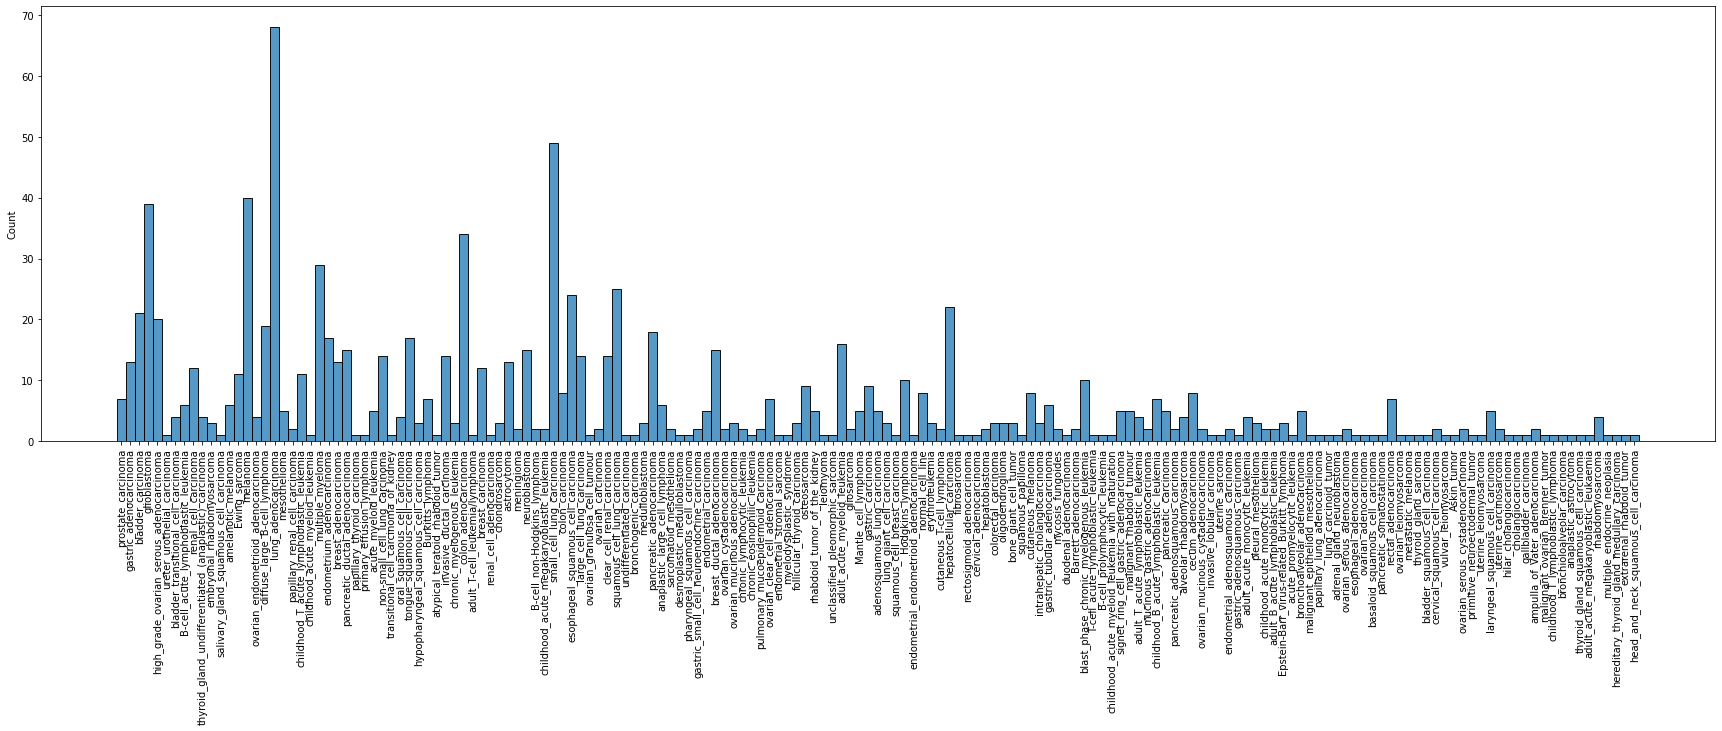

In [7]:
# plot the columns names to see the distribution of the data
plt.figure(figsize=(30, 8))
sns.histplot(new_col_names[2:])
plt.xticks(rotation=90)
plt.show()

In [8]:
# transpose the data
raw_data_t = raw_data.T
raw_data_t.reset_index(inplace=True)
# drop the first row make 2nd row the header
raw_data_t.columns = raw_data_t.iloc[1]
raw_data_t = raw_data_t[2:]

In [9]:
# Take index to a column
raw_data_t.head()

1,Gene_Name,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,LINC02689,ENSG00000285986,ENSG00000285987,ENSG00000285988,H2AQ1P,NBEAP6,ENSG00000285991,ENSG00000285992,ENSG00000285993,ENSG00000285994
2,prostate_carcinoma,7.0,NaN,151.0,17.0,24.0,NaN,0.1,100.0,124.0,...,NaN,NaN,NaN,NaN,NaN,0.4,0.1,0.3,NaN,NaN
3,gastric_adenocarcinoma,10.0,NaN,238.0,27.0,12.0,NaN,0.4,325.0,101.0,...,NaN,NaN,0.1,NaN,NaN,NaN,0.1,NaN,NaN,NaN
4,bladder_carcinoma,29.0,0.1,94.0,5.0,4.0,NaN,0.3,76.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN
5,bladder_carcinoma,33.0,NaN,132.0,5.0,9.0,NaN,0.1,60.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN
6,glioblastoma,33.0,NaN,223.0,5.0,9.0,NaN,0.4,99.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN


In [10]:
# rename the first column name as Gene and reset the index
raw_data_t.rename(columns={'Gene_Name': 'Cancer_type'}, inplace=True)


In [11]:
raw_data_t.head()

1,Cancer_type,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,LINC02689,ENSG00000285986,ENSG00000285987,ENSG00000285988,H2AQ1P,NBEAP6,ENSG00000285991,ENSG00000285992,ENSG00000285993,ENSG00000285994
2,prostate_carcinoma,7.0,NaN,151.0,17.0,24.0,NaN,0.1,100.0,124.0,...,NaN,NaN,NaN,NaN,NaN,0.4,0.1,0.3,NaN,NaN
3,gastric_adenocarcinoma,10.0,NaN,238.0,27.0,12.0,NaN,0.4,325.0,101.0,...,NaN,NaN,0.1,NaN,NaN,NaN,0.1,NaN,NaN,NaN
4,bladder_carcinoma,29.0,0.1,94.0,5.0,4.0,NaN,0.3,76.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN
5,bladder_carcinoma,33.0,NaN,132.0,5.0,9.0,NaN,0.1,60.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN
6,glioblastoma,33.0,NaN,223.0,5.0,9.0,NaN,0.4,99.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN,NaN


## Data Cleaning and imputation

In [12]:
# check null values in columns
raw_data_t.isnull().sum()

1
Cancer_type          0
TSPAN6              29
TNMD               848
DPM1                 0
SCYL3                0
                  ... 
NBEAP6             807
ENSG00000285991    216
ENSG00000285992    922
ENSG00000285993    777
ENSG00000285994    711
Length: 56444, dtype: int64

In [13]:
# genes with NaN values will be assumed as 0 expression
raw_data_t.fillna(0, inplace=True)

In [14]:
raw_data_t.head()

1,Cancer_type,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,LINC02689,ENSG00000285986,ENSG00000285987,ENSG00000285988,H2AQ1P,NBEAP6,ENSG00000285991,ENSG00000285992,ENSG00000285993,ENSG00000285994
2,prostate_carcinoma,7.0,0.0,151.0,17.0,24.0,0.0,0.1,100.0,124.0,...,0.0,0.0,0.0,0.0,0.0,0.4,0.1,0.3,0.0,0.0
3,gastric_adenocarcinoma,10.0,0.0,238.0,27.0,12.0,0.0,0.4,325.0,101.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.0
4,bladder_carcinoma,29.0,0.1,94.0,5.0,4.0,0.0,0.3,76.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
5,bladder_carcinoma,33.0,0.0,132.0,5.0,9.0,0.0,0.1,60.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
6,glioblastoma,33.0,0.0,223.0,5.0,9.0,0.0,0.4,99.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
